/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2021-06-18 00:33:23,862 [INFO] lithops.config -- Lithops v2.3.4
2021-06-18 00:33:23,952 [INFO] lithops.storage.backends.ibm_cos.ibm_cos -- IBM COS Storage client created - Region: eu-de
2021-06-18 00:33:23,953 [INFO] lithops.serverless.backends.ibm_cf.ibm_cf -- IBM CF client created - Region: eu-gb - Namespace: anna.graciac@estudiants.urv.cat_dev
2021-06-18 00:33:23,953 [INFO] lithops.executors -- Serverless Executor created with ID: 30173d-0
2021-06-18 00:33:23,957 [INFO] lithops.invokers -- ExecutorID 30173d-0 | JobID A000 - Selected Runtime: lithopscloud/ibmcf-python-v37 - 256MB
2021-06-18 00:33:23,966 [INFO] lithops.job.job -- ExecutorID 30173d-0 | JobID A000 - Uploading function and data - Total: 1.8KiB
2021-06-18 00:33:24,346 [INFO] lithops.invokers -- ExecutorID 30173d-0 | JobID A000 - Starting func

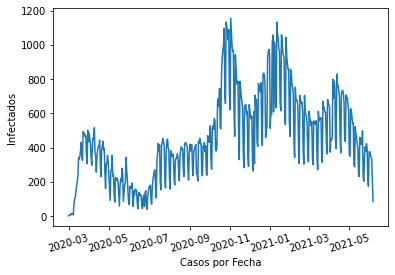

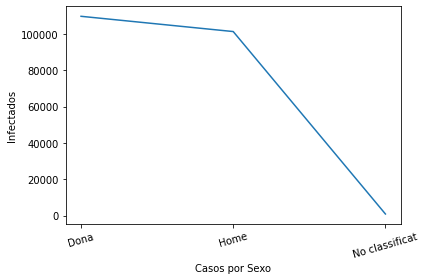

<Figure size 432x288 with 0 Axes>

In [1]:
%run main.py

<AxesSubplot:>

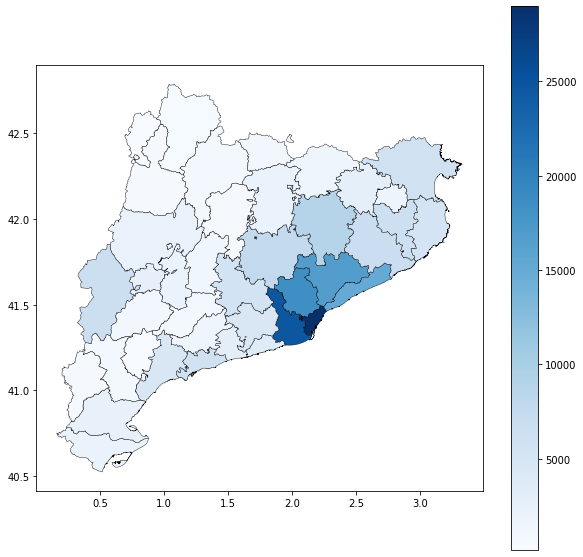

In [2]:
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt

datos = pd.read_csv('datos/Comarca.csv') 
datos = pd.DataFrame(datos, columns=['Comarca','Casos']) 
datos.head(42)
datos['Comarca'] = datos['Comarca'].astype(str)
#datos['Casos'] = datos['Casos'].astype(str)
#print(datos)
cat = gpd.read_file('datos/shapefiles_catalunya_comarcas.shp',enconding='utf-8')
#cambiar a mayusculas y quitar acentos
cat['nom_comar'] = cat['nom_comar'].str.upper()
a,b = 'ÀÈÍÓÚÜÑ','AEIOUUN'
trans = str.maketrans(a,b)
cat['nom_comar'] = cat['nom_comar'].str.translate(trans)

#hacer merge con el dataframe
cat = cat.merge(datos, left_on=['nom_comar'],right_on=['Comarca'], how='left')
plt.rcParams["figure.figsize"]=10,10

#mostrar mapa
cat.plot(
    column='Casos',
    legend=True,
    linewidth = 0.4,
    edgecolor='black',
    cmap = 'Blues')